#### Training and Visualizing a Decision Tree

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()

In [34]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [35]:
X = iris.data[:, 2:]
y = iris.target

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

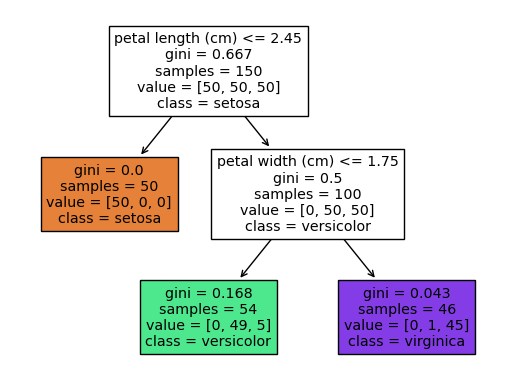

In [40]:
from sklearn import tree

tree.plot_tree(tree_clf,
              feature_names=iris.feature_names[2:],
              class_names=iris.target_names,
              filled=True)

We start at the root node (depth 0, at the top): this node asks whether the flower's petal length is smaller than 2.45cm. If it is, then we move down to the root's left child node(depth 1, left). In this case, it is a leaf node (i.e., it does not have any children nodes), so the flower is an Iris-Setosa.

But, if the petal length is greater than 2.45, then we must move down to the root's right child node (depth 1, right), which is not a leaf node, so it ask another question: is the petal width smaller than 1.75cm? If it is, then the flower is most likely an Iris-Versicolor(depth 2, left). If not, it is likely an Iris-Virginica (depth 2, right).


A node's samples attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45cm among which 54 have a petal width smaller than 1.75cm. A node's gini attribute measures its impurity: a node is pure if its gini=0 i.e. if all training instances it applies to belong to the same class. 

Gini impurity:
G = 1 - ∑(n, k=1) = P(i, k)^2

#### Model Interpretation: White Box Versus Black Box

White Box models like Decision tree are fairly intuitive and their decisions are easy to interpret.

Black Box models like Random Forests or Neural Networks are not that easy to explain why the predictions were made.

In [41]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [42]:
tree_clf.predict([[5, 1.5]])

array([1])

### The CART Training Algorithm

Sk-learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. It splits the training set in two subsets using a single feature k and a threshold tk such that the pair will produces the purest subsets (weighted by their size).

It splits the subsets using the same logic recursively until it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity. 

The CART algorithm is a greedy algorithm: it greadily searhes for an optimum split at top level, then repeats the process at each level. It does not check whetehr or not the split will lead to the lowest possible impurity several levels down. It doesn't guaranteed to be the optimal solution.

#### Gini Impurity or Entropy?

In ML, entropy is zero when it contains instances of only one class.

Entropy:

Hi = - ∑(n, k=1, p(i,k)!=0)   p(i, k)log(p(i, k))
 

Most of the time both Gini impurity and Entropy leads to similar trees. Gini impurity is slightly faster to compute, so it is a good default. 

Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

#### Regularization Hyperparameters

Decision trees can overfit the data. To avoid overfitting the training data, we can use regularization hyperparameters. Some hypermeters in Sk-learn:

max_depth: default is None. Reducing it will regularize the model and thus reduce the risk of overfitting.

min_samples_split: the minimum number of samples a node must have before it can be split.

min_samples_leaf: the minimum number of samples a leaf node must have.

min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances

max_leaf_nodes: maximum number of leaf nodes

max_features: maximum number of features that are evaluated for splitting at each node.

### Regression

In [43]:
import numpy as np

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'X[0] <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'X[0] <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

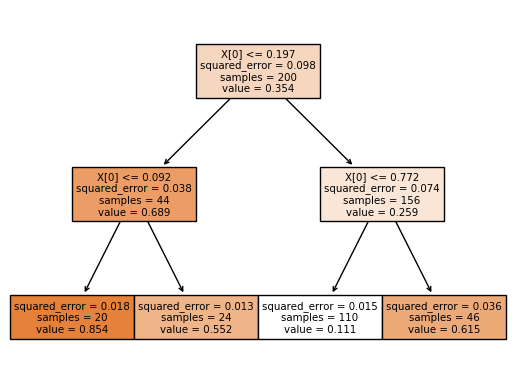

In [45]:
from sklearn import tree

tree.plot_tree(tree_reg,
              filled=True)

#### Instability

As Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. 

If we remove the widest Iris-versicolor from the iris training set and train a new Decision tree, we can see huge difference from the previous Decision Tree. 

Random Forests can limit this instability by averaging predictions over many trees, as we will see in the next chapter.

### Exercises

 1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?
--> The depth of a well-balanced binary tree containing m leaves is equal to log2(m)^3, rounded up. 
___


 2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?
 --> A node's Gini impurity is generally lower than its parent's. CART training algorithm's cost function splits each node in a way that minimizes the weighted sum of its children's Gini impurities.
___


 3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?
 --> Yes as it will regularize the model.
 ___
 
 
 4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?
 --> Decision Trees don't care whether or not the training data is scaled or centered.
 ___
 
 
 5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?
 --> The computational complexity of training a Decision Tree is O(n x mlog(m)). So if we multiply the training set size by 10. Then it will increase by 10log(10*10^6)/log(10^6) = 11.67 hours.
___


6. If your training set contains 100,000 instances, will setting presort=True speed up training?
--> Presorting the training set speeds up training for only small dataset less than few thousand instances. If it contains 100,000 instances, it will considerably slow down training.

 #### Train and fine-tune a Decision Tree for the moons dataset.
 a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
 
 b. Split it into a training set and a test set using train_test_split().

 c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a       DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
 
 d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You      should get roughly 85% to 87% accuracy.

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_moon = Pipeline((("scaler", StandardScaler()),
                     ("tree_clf", DecisionTreeClassifier())))

In [9]:
from sklearn.model_selection import GridSearchCV

params = {"tree_clf__max_leaf_nodes": list(range(2, 100)), 'tree_clf__min_samples_split':[2, 3, 4]}
grid_search_cv = GridSearchCV(tree_moon, params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=(('scaler', StandardScaler()),
                                       ('tree_clf', DecisionTreeClassifier()))),
             param_grid={'tree_clf__max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                         'tree_clf__min_samples_split': [2, 3, 4]},
             verbose=1)

In [10]:
grid_search_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree_clf', DecisionTreeClassifier(max_leaf_nodes=24))])

In [12]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

####  8. Grow a forest.
 a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit Learn’s ShuffleSplit class for this.
 
 b. Train one Decision Tree on each subset, using the best hyperparameter valuesfound above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.
 
 c. Now comes the magic. For each test set instance, generate the predictions ofthe 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This gives you majority-vote predictions over the test set.
 
 d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [13]:
from sklearn.model_selection import ShuffleSplit

mini_sets = []

rs = ShuffleSplit(n_splits=1000, test_size=len(X_train)-100, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))
    

In [19]:
from sklearn.base import clone
import numpy as np

forest = [clone(grid_search_cv.best_estimator_) for _  in range(1000)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7933343333333334

In [21]:
Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [22]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [23]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8643333333333333